In [2]:
import matplotlib.pyplot as plt 
import random 
import numpy as np 
from scipy.integrate import odeint

In [3]:
p0 = 0
m0 = 3
t_max = 30
phi = 20
alpha = 10
gamma = 5
beta = 20

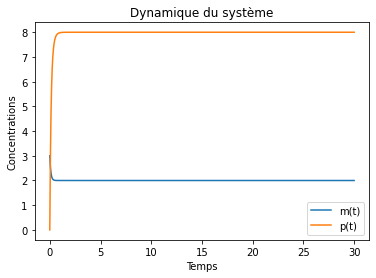

In [4]:
def vitesse_m(m, t, phi, alpha):
    dm_dt = phi - alpha * m
    return dm_dt

def vitesse_p(p, t, beta, gamma, m_t):
    dp_dt = beta * m_t - gamma * p
    return dp_dt

def m_tilde(m0, phi, alpha, t):
    return odeint(vitesse_m, m0, t, args=(phi, alpha))

def p_tilde(p0, beta, gamma, m_tilde, t):
    p_sol = np.zeros_like(t)
    p_sol[0] = p0 
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        p_sol[i] = p_sol[i-1] + vitesse_p(p_sol[i-1], t[i], beta, gamma, m_tilde[i]) * dt
    return p_sol


# Simulation
instants = np.linspace(0, t_max, 1000)
m_sim = m_tilde(m0, phi, alpha, instants).flatten()
p_sim = p_tilde(p0, beta, gamma, m_sim, instants)

plt.plot(instants, m_sim, label='m(t)')
plt.plot(instants, p_sim, label='p(t)')
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.legend()
plt.title('Dynamique du système')
plt.show()


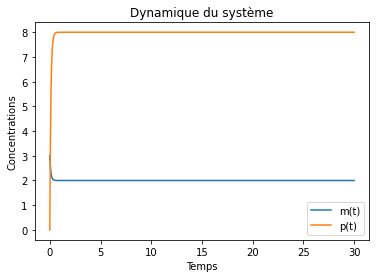

In [5]:
def m_tilde1(m0 , alpha, phi, temps):
    resultat = []
    for t in temps: 
        resultat.append((m0 - phi/alpha)*(np.exp(-alpha*t)) + phi/alpha)

    return resultat

def p_tilde1( alpha, beta ,gamma , phi, temps):
    resultat = []
    for t in temps: 
        resultat.append((beta*phi/alpha)*( -(np.exp(-gamma*t))*(1/(gamma - alpha) + 1/gamma)+ (np.exp(-alpha*t))/(gamma - alpha) +1/gamma ) )
    return resultat

m_sim = m_tilde1(m0, alpha, phi, instants)
p_sim = p_tilde1(alpha, beta, gamma, phi, instants)

plt.plot(instants, m_sim, label='m(t)')
plt.plot(instants, p_sim, label='p(t)')
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.legend()
plt.title('Dynamique du système')
plt.show()

    

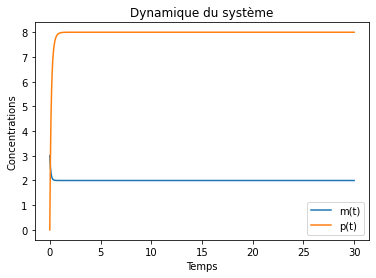

In [6]:
def vitesse(x,t):
    m, p = x
    dm_dt = phi - alpha*m
    dp_dt = beta*m - gamma*p
    return np.array([dm_dt, dp_dt])


x_ini = [m0, p0]
instants = np.linspace(0, t_max, 1000) 
x_sim = odeint(vitesse, x_ini, instants )


plt.plot(instants, x_sim[:, 0], label='m(t)')
plt.plot(instants, x_sim[:, 1], label='p(t)')
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.legend()
plt.title('Dynamique du système')
plt.show()

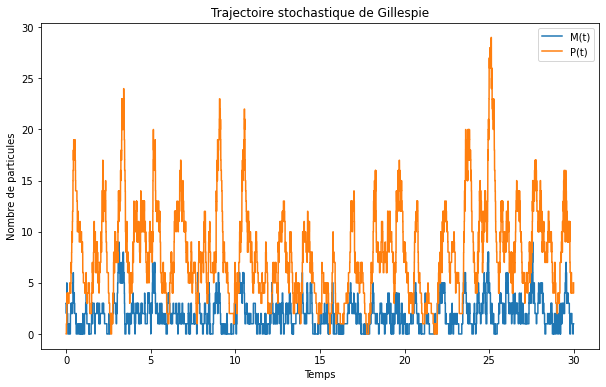

In [7]:
def Reaction(M, P, phi, alpha, beta, gamma):
    # Calculer les taux de réaction pour chaque événement
    rates = np.array([phi, alpha * M, beta * M, gamma * P])
    total_rate = np.sum(rates)
    
    # Tirer aléatoirement un événement basé sur les taux
    rand = random.random() * total_rate
    for i, rate in enumerate(np.cumsum(rates)):
        if rand < rate:
            return i  # Retourner l'indice de l'événement choisi

def Gillespie(m0, p0, phi, alpha, beta, gamma, t_max):
    M, P = m0, p0
    t = 0
    times = [t]
    Ms = [M]
    Ps = [P]
    
    while t < t_max:
        rates = np.array([phi, alpha * M, beta * M, gamma * P])
        total_rate = np.sum(rates)
        tau = np.random.exponential(1 / total_rate)
        t += tau
        
        if t > t_max:  # S'assurer de ne pas dépasser t_max
            break
        
        event = Reaction(M, P, phi, alpha, beta, gamma)
        
        if event == 0:
            M += 1
        elif event == 1:
            M -= 1
        elif event == 2:
            P += 1
        elif event == 3:
            P -= 1
        
        times.append(t)
        Ms.append(M)
        Ps.append(P)
    
    return times, Ms, Ps


times, Ms, Ps = Gillespie(m0, p0, phi, alpha, beta, gamma, t_max)

plt.figure(figsize=(10, 6))
plt.step(times, Ms, where='post', label='M(t)')
plt.step(times, Ps, where='post', label='P(t)')
plt.xlabel('Temps')
plt.ylabel('Nombre de particules')
plt.legend()
plt.title('Trajectoire stochastique de Gillespie')
plt.show()

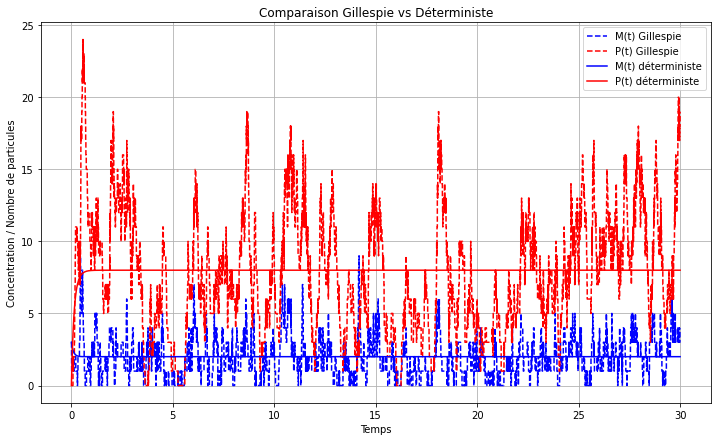

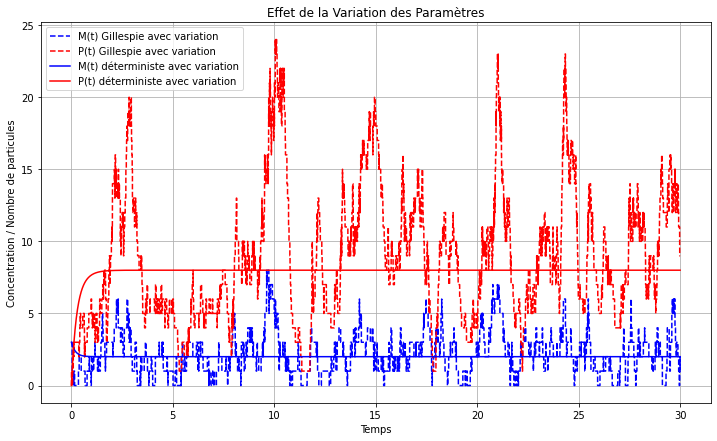

In [8]:
times_g, Ms_g, Ps_g = Gillespie(m0, p0, phi, alpha, beta, gamma, t_max)


instants = np.linspace(0, t_max, 1000)
m_deter = m_tilde(m0, phi, alpha, instants)
p_deter = p_tilde(p0, beta, gamma, m_deter, instants)

plt.figure(figsize=(12, 7))


plt.step(times_g, Ms_g, where='post', label='M(t) Gillespie', linestyle='--', color='blue')
plt.step(times_g, Ps_g, where='post', label='P(t) Gillespie', linestyle='--', color='red')


plt.plot(instants, m_deter, label='M(t) déterministe', color='blue')
plt.plot(instants, p_deter, label='P(t) déterministe', color='red')

plt.xlabel('Temps')
plt.ylabel('Concentration / Nombre de particules')
plt.legend()
plt.title('Comparaison Gillespie vs Déterministe')
plt.grid(True)
plt.show()


phi_var, alpha_var, beta_var, gamma_var = 10, 5, 10, 2.5  # Nouveaux paramètres pour observer les effets


times_g_var, Ms_g_var, Ps_g_var = Gillespie(m0, p0, phi_var, alpha_var, beta_var, gamma_var, t_max)


m_deter_var = m_tilde(m0, phi_var, alpha_var, instants)
p_deter_var = p_tilde(p0, beta_var, gamma_var, m_deter_var, instants)

plt.figure(figsize=(12, 7))


# Tracé de Gillespie avec variation
plt.step(times_g_var, Ms_g_var, where='post', label='M(t) Gillespie avec variation', linestyle='--', color='blue')
plt.step(times_g_var, Ps_g_var, where='post', label='P(t) Gillespie avec variation', linestyle='--', color='red')

# Tracé des solutions déterministes avec variation
plt.plot(instants, m_deter_var, label='M(t) déterministe avec variation', color='blue')
plt.plot(instants, p_deter_var, label='P(t) déterministe avec variation', color='red')

plt.xlabel('Temps')
plt.ylabel('Concentration / Nombre de particules')
plt.legend()
plt.title('Effet de la Variation des Paramètres')
plt.grid(True)
plt.show()

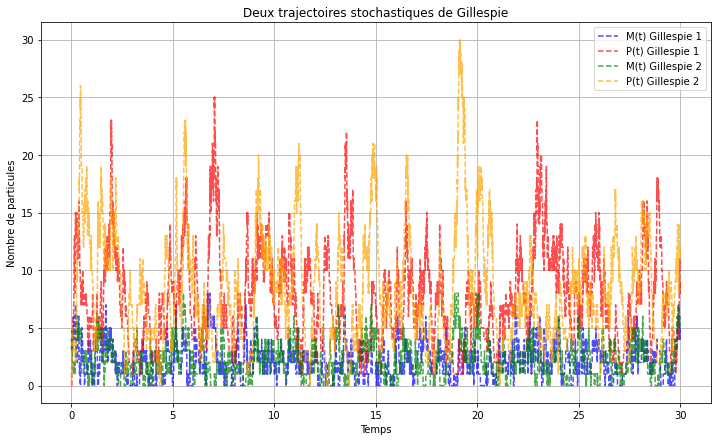

In [9]:
# Tracer deux trajectoires de l'algorithme de Gillespie avec les paramètres originaux
times_g1, Ms_g1, Ps_g1 = Gillespie(m0, p0, phi, alpha, beta, gamma, t_max)
times_g2, Ms_g2, Ps_g2 = Gillespie(m0, p0, phi, alpha, beta, gamma, t_max)

plt.figure(figsize=(12, 7))

# Première trajectoire
plt.step(times_g1, Ms_g1, where='post', label='M(t) Gillespie 1', linestyle='--', color='blue', alpha=0.7)
plt.step(times_g1, Ps_g1, where='post', label='P(t) Gillespie 1', linestyle='--', color='red', alpha=0.7)

# Deuxième trajectoire
plt.step(times_g2, Ms_g2, where='post', label='M(t) Gillespie 2', linestyle='--', color='green', alpha=0.7)
plt.step(times_g2, Ps_g2, where='post', label='P(t) Gillespie 2', linestyle='--', color='orange', alpha=0.7)

plt.xlabel('Temps')
plt.ylabel('Nombre de particules')
plt.legend()
plt.title('Deux trajectoires stochastiques de Gillespie')
plt.grid(True)
plt.show()

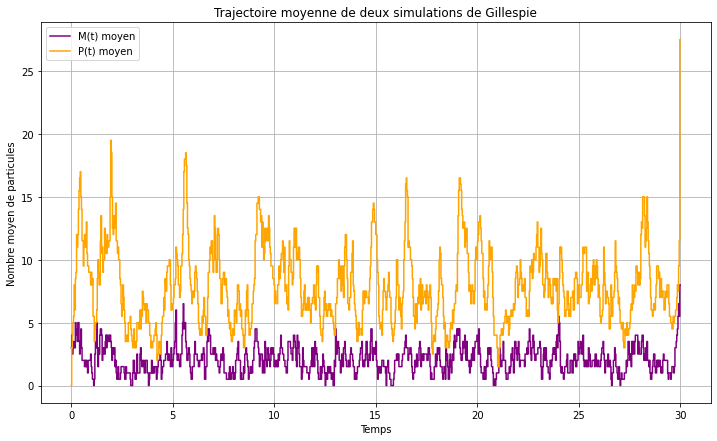

In [10]:
from scipy.interpolate import interp1d

def moyenner_trajectoires(times1, Ms1, Ps1, times2, Ms2, Ps2, t_max):
    # Créer un ensemble commun d'instants de temps pour l'interpolation, allant de 0 à t_max
    instants_common = np.linspace(0, t_max, 1000)
    
    # Interpoler les valeurs de M et P pour les deux trajectoires sur cet ensemble d'instants
    interp_Ms1 = interp1d(times1, Ms1, kind='previous', bounds_error=False, fill_value="extrapolate")(instants_common)
    interp_Ps1 = interp1d(times1, Ps1, kind='previous', bounds_error=False, fill_value="extrapolate")(instants_common)
    
    interp_Ms2 = interp1d(times2, Ms2, kind='previous', bounds_error=False, fill_value="extrapolate")(instants_common)
    interp_Ps2 = interp1d(times2, Ps2, kind='previous', bounds_error=False, fill_value="extrapolate")(instants_common)
    
    # Calculer la moyenne des valeurs interpolées pour M et P
    moyenne_Ms = (interp_Ms1 + interp_Ms2) / 2
    moyenne_Ps = (interp_Ps1 + interp_Ps2) / 2
    
    return instants_common, moyenne_Ms, moyenne_Ps

# Calculer la moyenne de deux trajectoires
instants_moy, Ms_moy, Ps_moy = moyenner_trajectoires(times_g1, Ms_g1, Ps_g1, times_g2, Ms_g2, Ps_g2, t_max)

# Afficher le résultat
plt.figure(figsize=(12, 7))
plt.step(instants_moy, Ms_moy, where='mid', label='M(t) moyen', color='purple')
plt.step(instants_moy, Ps_moy, where='mid', label='P(t) moyen', color='orange')
plt.xlabel('Temps')
plt.ylabel('Nombre moyen de particules')
plt.legend()
plt.title('Trajectoire moyenne de deux simulations de Gillespie')
plt.grid(True)
plt.show()

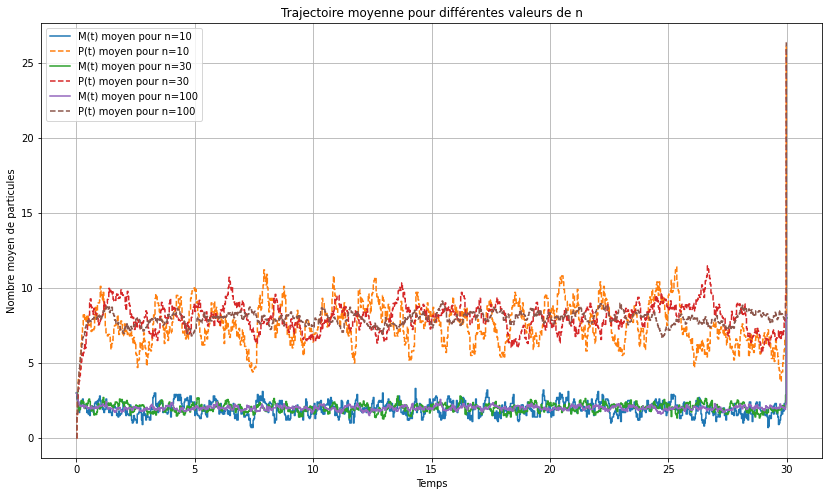

In [11]:
def moyenne_n_trajectoires(n, m0, p0, phi, alpha, beta, gamma, t_max):
    # Initialiser une liste pour stocker les trajectoires interpolées
    Ms_interpolated = []
    Ps_interpolated = []
    instants_common = np.linspace(0, t_max, 1000)

    for _ in range(n):
        times, Ms, Ps = Gillespie(m0, p0, phi, alpha, beta, gamma, t_max)
        interp_Ms = interp1d(times, Ms, kind='previous', bounds_error=False, fill_value="extrapolate")(instants_common)
        interp_Ps = interp1d(times, Ps, kind='previous', bounds_error=False, fill_value="extrapolate")(instants_common)
        
        Ms_interpolated.append(interp_Ms)
        Ps_interpolated.append(interp_Ps)

    # Calculer la moyenne des trajectoires
    moyenne_Ms = np.mean(Ms_interpolated, axis=0)
    moyenne_Ps = np.mean(Ps_interpolated, axis=0)

    return instants_common, moyenne_Ms, moyenne_Ps

# Calculer et tracer la moyenne pour différentes valeurs de n
plt.figure(figsize=(14, 8))

for n in [10, 30, 100]:
    instants_moy, Ms_moy, Ps_moy = moyenne_n_trajectoires(n, m0, p0, phi, alpha, beta, gamma, t_max)
    plt.step(instants_moy, Ms_moy, where='mid', label=f'M(t) moyen pour n={n}')
    plt.step(instants_moy, Ps_moy, where='mid', label=f'P(t) moyen pour n={n}', linestyle='--')

plt.xlabel('Temps')
plt.ylabel('Nombre moyen de particules')
plt.legend()
plt.title('Trajectoire moyenne pour différentes valeurs de n')
plt.grid(True)
plt.show()


In [19]:
# Génération de trajectoires et évaluation à t* = 20

n_trajectoires = 1000 
t_eval = 20  
Ps_at_t = [] 

for _ in range(n_trajectoires):
    times, _, Ps = Gillespie(m0, p0, phi, alpha, beta, gamma, t_max)
    Ps_interp = interp1d(times, Ps, kind='previous', bounds_error=False, fill_value="extrapolate")(t_eval)
    Ps_at_t.append(Ps_interp)


variance_P_at_t = np.var(Ps_at_t)



(18.600991, 0.925, {1000: 1.0, 2000: 1.0})

In [39]:
# Calcul de la probabilité que P dépasse 2.1 à t* = 20
P_threshold = 3
prob_P_surpass = np.mean(np.array(Ps_at_t) > P_threshold)

N_values = [1000, 10000, 100000]
survival_probs = {N: 1 - (1 - prob_P_surpass)**N for N in N_values}


variance_P_at_t, prob_P_surpass

(18.600991, 0.862)

In [29]:

survival_probs = {N: 1 - (1 - prob_P_surpass)**N for N in N_values}
survival_probs

{1000: 1.0, 10000: 1.0, 100000: 1.0}